     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


T-statistic: -8.551459943248743
P-value: 3.292961428703462e-15


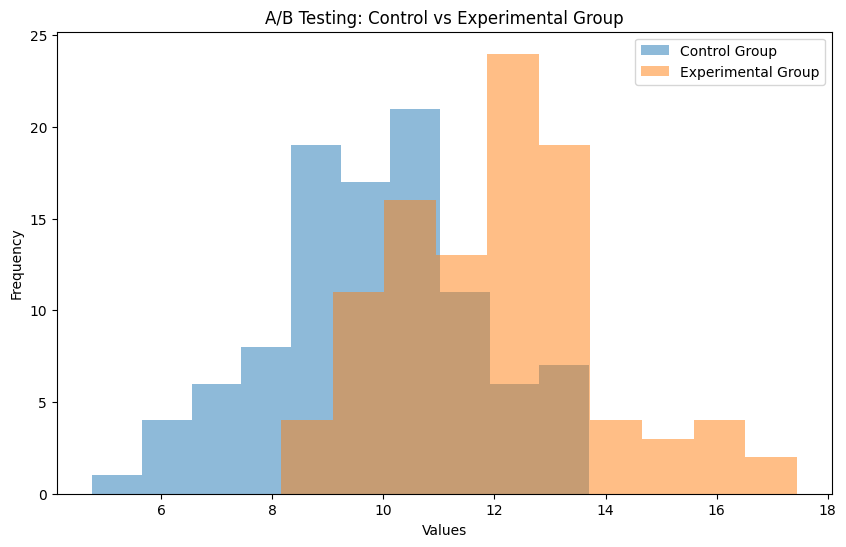

                            OLS Regression Results                            
Dep. Variable:     Experimental Group   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.858
Date:                Wed, 28 Feb 2024   Prob (F-statistic):              0.176
Time:                        18:06:54   Log-Likelihood:                -205.02
No. Observations:                 100   AIC:                             414.0
Df Residuals:                      98   BIC:                             419.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.4474      1.046     12.851

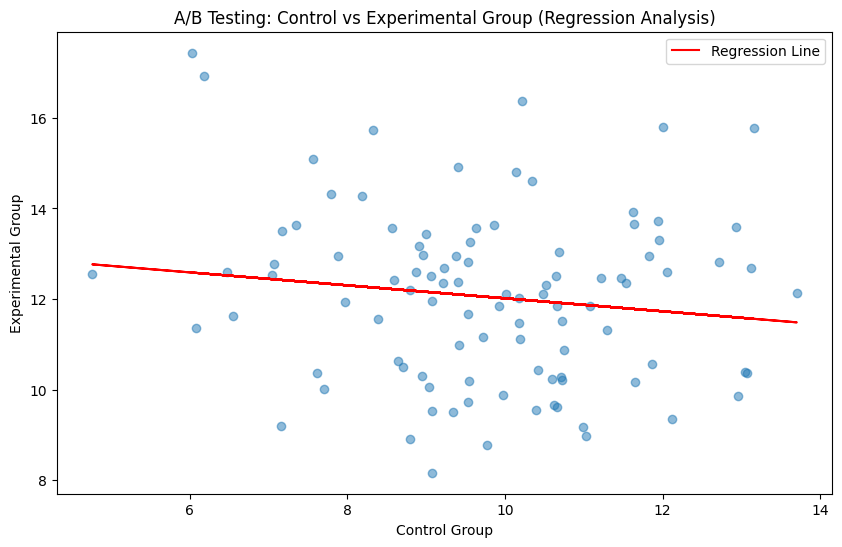

In [1]:
!pip install -U scikit-learn scipy statsmodels matplotlib

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate example data for A/B testing
np.random.seed(42)
control_group = np.random.normal(loc=10, scale=2, size=100)
experimental_group = np.random.normal(loc=12, scale=2, size=100)

# Conduct t-test to compare means of two groups
t_stat, p_value = stats.ttest_ind(control_group, experimental_group)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.hist(control_group, alpha=0.5, label='Control Group')
plt.hist(experimental_group, alpha=0.5, label='Experimental Group')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('A/B Testing: Control vs Experimental Group')
plt.legend()
plt.show()

# Create a dataframe
df = pd.DataFrame({'Control Group': control_group, 'Experimental Group': experimental_group})

# Add constant to independent variable
X = sm.add_constant(df['Control Group'])

# Fit linear regression model
model = sm.OLS(df['Experimental Group'], X).fit()

# Summary of the model
print(model.summary())

# Plotting regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Control Group'], df['Experimental Group'], alpha=0.5)
plt.plot(df['Control Group'], model.predict(), color='red', label='Regression Line')
plt.xlabel('Control Group')
plt.ylabel('Experimental Group')
plt.title('A/B Testing: Control vs Experimental Group (Regression Analysis)')
plt.legend()
plt.show()
